In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sklearn.model_selection import train_test_split

# Exersice 1

1- Use sympy to calculate the Jocobian of the following functions

- $f(x, y) = x^2 + y^2$
- $f(x, y) = \frac{sin(10(x^2+y^2))}{10}$
- $f(x, y) = (x^2 + y^2)^{(0.5)}$
- $f(x, y) = \frac{sin(5x)cos(5y)}{5}$

2- Plot the functions

In [2]:
#Anwser exersice 1.1
x = sp.Symbol('x')
y = sp.Symbol('y')

f1 = x**2 + y**2
f2 = sp.sin(10*(x**2 + y**2)) / 10
f3 = sp.sqrt(x**2 + y**2)
f4 = (sp.sin(5*x)*sp.cos(5*y)) / 5

f1_jacobian = sp.Matrix([f1]).jacobian([x, y])
f2_jacobian = sp.Matrix([f2]).jacobian([x, y])
f3_jacobian = sp.Matrix([f3]).jacobian([x, y])
f4_jacobian = sp.Matrix([f4]).jacobian([x, y])

print("Jacobian vector for f1:")
print(f1_jacobian, '\n')
print("Jacobian vector for f2:")
print(f2_jacobian, '\n')
print("Jacobian vector for f3:")
print(f3_jacobian, '\n')
print("Jacobian vector for f4:")
print(f4_jacobian, '\n')

Jacobian vector for f1:
Matrix([[2*x, 2*y]]) 

Jacobian vector for f2:
Matrix([[2*x*cos(10*x**2 + 10*y**2), 2*y*cos(10*x**2 + 10*y**2)]]) 

Jacobian vector for f3:
Matrix([[x/sqrt(x**2 + y**2), y/sqrt(x**2 + y**2)]]) 

Jacobian vector for f4:
Matrix([[cos(5*x)*cos(5*y), -sin(5*x)*sin(5*y)]]) 



Text(0.5, 0.92, 'f4 = (sin(5*x)*cos(5*y)) / 5')

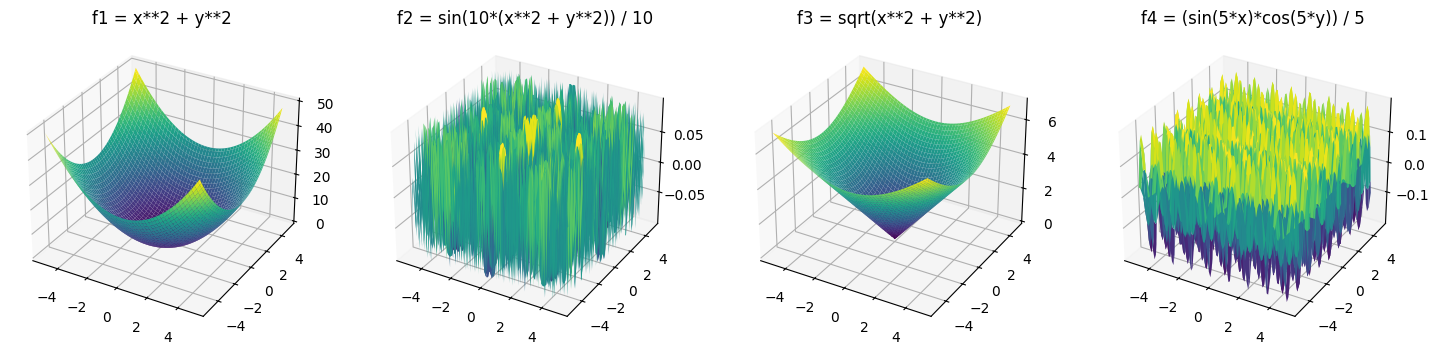

In [3]:
#Anwser exersice 1.2
f1_num = sp.lambdify((x, y), f1, 'numpy' )
f2_num = sp.lambdify((x, y), f2, 'numpy' )
f3_num = sp.lambdify((x, y), f3, 'numpy' )
f4_num = sp.lambdify((x, y), f4, 'numpy' )

x_axis = np.arange(-5,5,0.1)
y_axis = np.arange(-5,5,0.1)
X, Y = np.meshgrid(x_axis, y_axis)

Z1 = f1_num(X, Y)
Z2 = f2_num(X, Y)
Z3 = f3_num(X, Y)
Z4 = f4_num(X, Y)

fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(1, 4, 1, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis')
ax1.set_title('f1 = x**2 + y**2')

ax2 = fig.add_subplot(1, 4, 2, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='viridis')
ax2.set_title('f2 = sin(10*(x**2 + y**2)) / 10')

ax3 = fig.add_subplot(1, 4, 3, projection='3d')
ax3.plot_surface(X, Y, Z3, cmap='viridis')
ax3.set_title('f3 = sqrt(x**2 + y**2)')

ax4 = fig.add_subplot(1, 4, 4, projection='3d')
ax4.plot_surface(X, Y, Z4, cmap='viridis')
ax4.set_title('f4 = (sin(5*x)*cos(5*y)) / 5')

# Exersice 2

1- Use sympy to calculate the Hessian of the following functions

- $f(x) = x^2 + y^2$
- $f(x) = \frac{sin(10(x^2+y^2))}{10}$
- $f(x) = (x^2 + y^2)^{(0.5)}$
- $f(x) = \frac{sin(5x)cos(5y)}{5}$


In [4]:
#Anwser exersice 2
x = sp.Symbol('x')
y = sp.Symbol('y')

f1 = x**2 + y**2
f2 = sp.sin(10*(x**2 + y**2)) / 10
f3 = sp.sqrt(x**2 + y**2)
f4 = (sp.sin(5*x)*sp.cos(5*y)) / 5

f1_hessian = sp.Matrix([f1]).jacobian([x, y]).jacobian([x, y])
f2_hessian = sp.Matrix([f2]).jacobian([x, y]).jacobian([x, y])
f3_hessian = sp.Matrix([f3]).jacobian([x, y]).jacobian([x, y])
f4_hessian = sp.Matrix([f4]).jacobian([x, y]).jacobian([x, y])

print("Hessian matrix for f1:")
print(f1_hessian)
print()
print("Hessian matrix for f2:")
print(f2_hessian)
print()
print("Hessian matrix for f3:")
print(f3_hessian)
print()
print("Hessian matrix for f4:")
print(f4_hessian)

Hessian matrix for f1:
Matrix([[2, 0], [0, 2]])

Hessian matrix for f2:
Matrix([[-40*x**2*sin(10*x**2 + 10*y**2) + 2*cos(10*x**2 + 10*y**2), -40*x*y*sin(10*x**2 + 10*y**2)], [-40*x*y*sin(10*x**2 + 10*y**2), -40*y**2*sin(10*x**2 + 10*y**2) + 2*cos(10*x**2 + 10*y**2)]])

Hessian matrix for f3:
Matrix([[-x**2/(x**2 + y**2)**(3/2) + 1/sqrt(x**2 + y**2), -x*y/(x**2 + y**2)**(3/2)], [-x*y/(x**2 + y**2)**(3/2), -y**2/(x**2 + y**2)**(3/2) + 1/sqrt(x**2 + y**2)]])

Hessian matrix for f4:
Matrix([[-5*sin(5*x)*cos(5*y), -5*sin(5*y)*cos(5*x)], [-5*sin(5*y)*cos(5*x), -5*sin(5*x)*cos(5*y)]])


# Exersice 3

<img src="./images/NN.png" width=600 height=400 />

The sig function in the shown neural network is defined as follows:

$f(x) = \frac{1}{1+e^{-x}}$

each node with Sum symbol inside does the following type of calculation (for example the left top neuorn):

$z_1 = w_1x + b_1 $

The loss function for the netrowk is defined as follows:

$E(x,y,w_1,w_2,w_3,w_4,b_1,b_2,b_3) = \Sigma_{i=1}^{n} (\hat{y_i} - y_i)^2$

1- Calculate the derivative of the loss function with respect to all parameters

2- use the following formula update the parameters acccording to the calculated gradient

$w = w - lr\frac{dE}{dw}$

$w$ can be replaced by any parameters in your network
start with a very small learning rate. For example lr = 0.01

For the dataset to train the network use the following set of (x,y) points

3- From the 500 data points generated below, use 300 randomly selected for training and the rest 200 points for testing the performace of the network

4- Plot the predicted values agaist the actual values

5- Use mean square error to check the error of your trained network

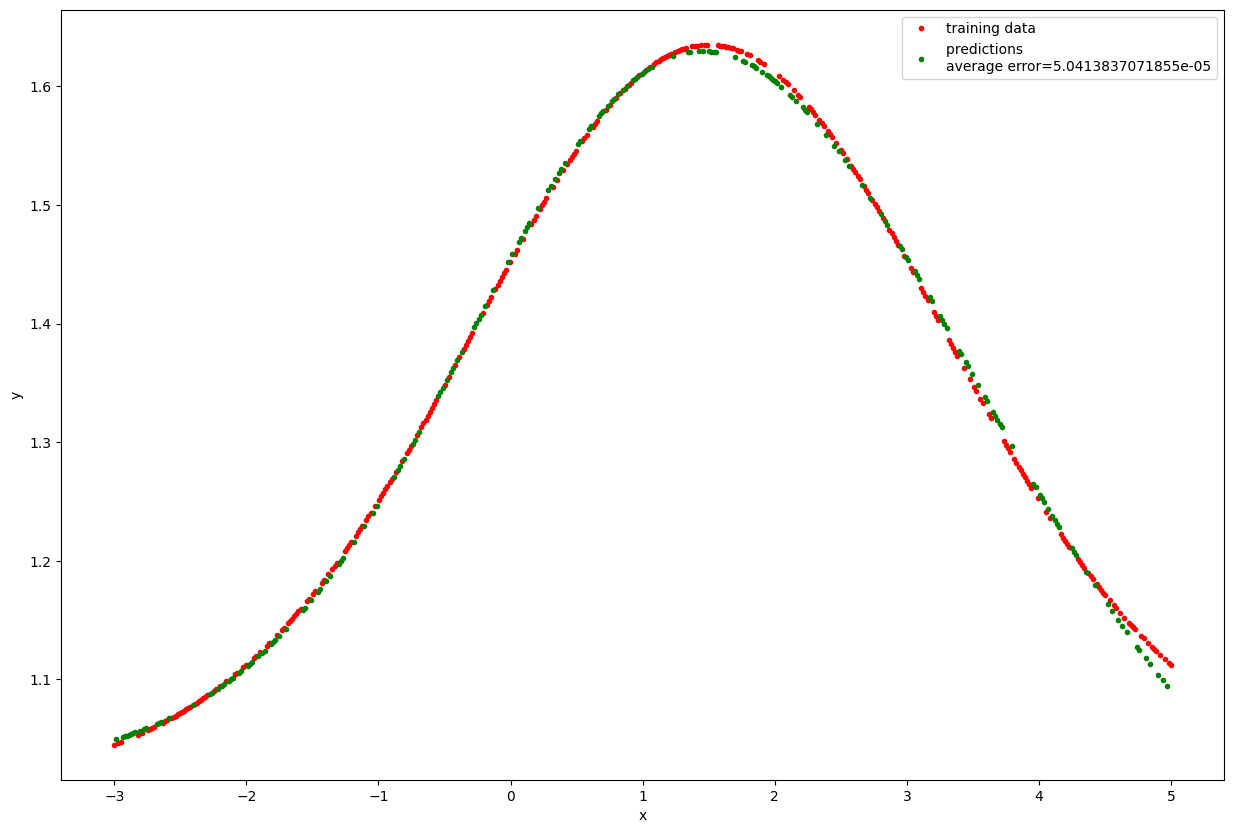

In [7]:
#support functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def calculate_error(y_pred, y_true):
    return (y_pred - y_true)**2

def gradiant_descent(parameter, learning_rate, derivative):
    return parameter - (learning_rate * derivative)

def initialize_parameter_values():
    np.random.seed(0) 
    parameters = {'w1': np.random.randn(), 'w2': np.random.randn(), 'w3': np.random.randn(), 'w4': np.random.randn(), 'b1': np.random.randn(), 'b2': np.random.randn(), 'b3': np.random.randn()
    }
    return parameters

def initialize_derivative_values():
    return {'w1': 0, 'w2': 0, 'w3': 0, 'w4': 0, 'b1': 0, 'b2': 0, 'b3': 0}

def calculate_derivatives(forward_pass_values, derivatives, parameters, y_pred, y_train, x_train):
    dE_dy = 2*(y_pred - y_train)
    derivatives['w3'] += dE_dy * forward_pass_values['y1']
    derivatives['w4'] += dE_dy * forward_pass_values['y2']
    derivatives['b3'] += dE_dy
    dE_dy1 = dE_dy * parameters['w3'] * forward_pass_values['y1'] * (1 - forward_pass_values['y1'])
    dE_dy2 = dE_dy * parameters['w4'] * forward_pass_values['y2'] * (1 - forward_pass_values['y1'])
    derivatives['w1'] += dE_dy1 * x_train
    derivatives['w2'] += dE_dy2 * x_train
    derivatives['b1'] += dE_dy1
    derivatives['b2'] += dE_dy2
    return derivatives

def forward_pass(parameters, x):
    j1 = parameters['w1']*x + parameters['b1']
    j2 = parameters['w2']*x + parameters['b2']
    y1 = sigmoid(j1)
    y2 = sigmoid(j2)
    y_pred = parameters['w3']*y1 + parameters['w4']*y2 + parameters['b3']    
    return {'j1':j1, 'j2':j2, 'y1':y1, 'y2':y2, 'y_pred':y_pred}

def backward_pass(parameters, derivatives, learning_rate):
    for key in parameters:
        parameters[key] -= learning_rate * derivatives[key]
    return parameters

# Main functions
def fit(x_train, y_train, n_passes=1, learning_rate=0.01):
    parameters = initialize_parameter_values()
    for _ in range(n_passes):
        derivatives = initialize_derivative_values()
        total_error = 0
        for i in range(len(x_train)):    
            forward_pass_values = forward_pass(parameters, x_train[i])
            error = calculate_error(forward_pass_values['y_pred'], y_train[i])
            total_error += error
            derivatives = calculate_derivatives(forward_pass_values, derivatives, parameters, forward_pass_values['y_pred'], y_train[i], x_train[i])
            parameters = backward_pass(parameters, derivatives, learning_rate)
    average_error = total_error / len(x_train)
    return parameters, average_error

def predict(trained_parameters, x_test):
    y_pred = []
    for i in range(len(x_test)):
        forward_pass_values = forward_pass(trained_parameters, x_test[i])
        y_pred.append(forward_pass_values['y_pred'])
    return np.array(y_pred)

##############################################################################################################################################################################

x = np.linspace(-3, 5, 500)
y = 1/(1+np.e**(-x)) + 1/(1+np.e**(-(3-x))) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=200)

trained_parameters, average_error = fit(x_train, y_train, n_passes=1000, learning_rate=0.001)

y_pred = predict(trained_parameters, x_test)

plt.figure(figsize=(15, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train, y_train, '.', c='r', label='training data')
plt.plot(x_test, y_pred, '.', c='g', label=f'predictions \naverage error={average_error}')
plt.legend()
plt.show()